<a href="https://colab.research.google.com/github/GabyGarPa/Fourier-/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

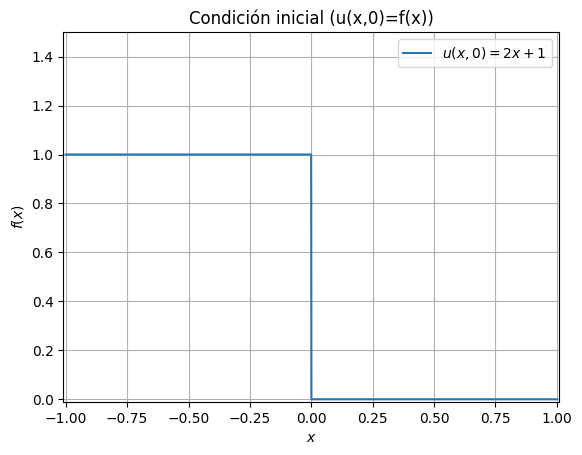

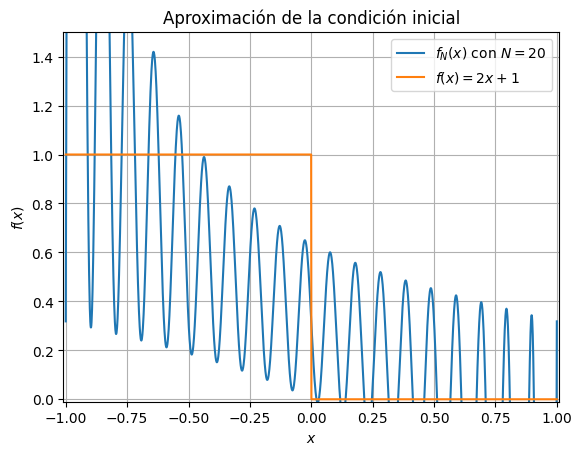

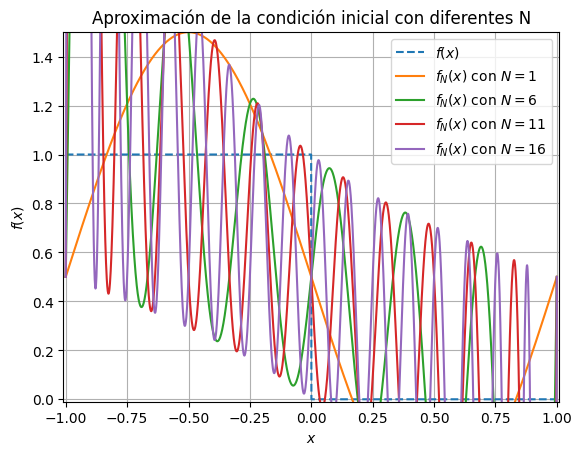

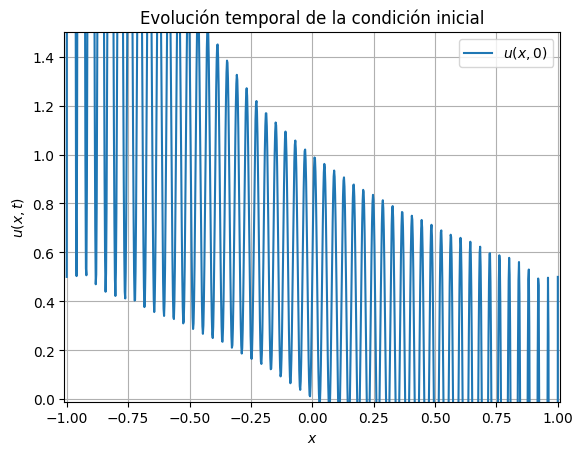

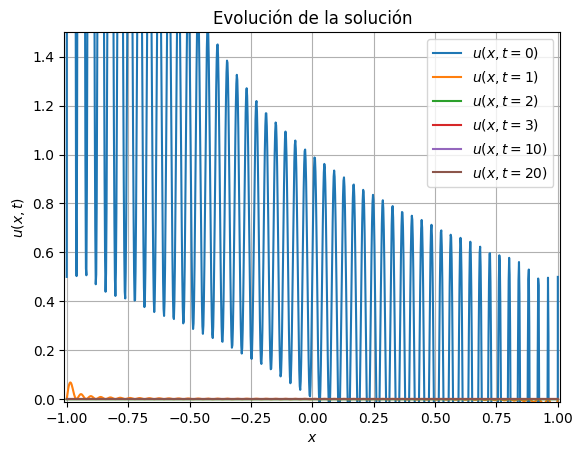

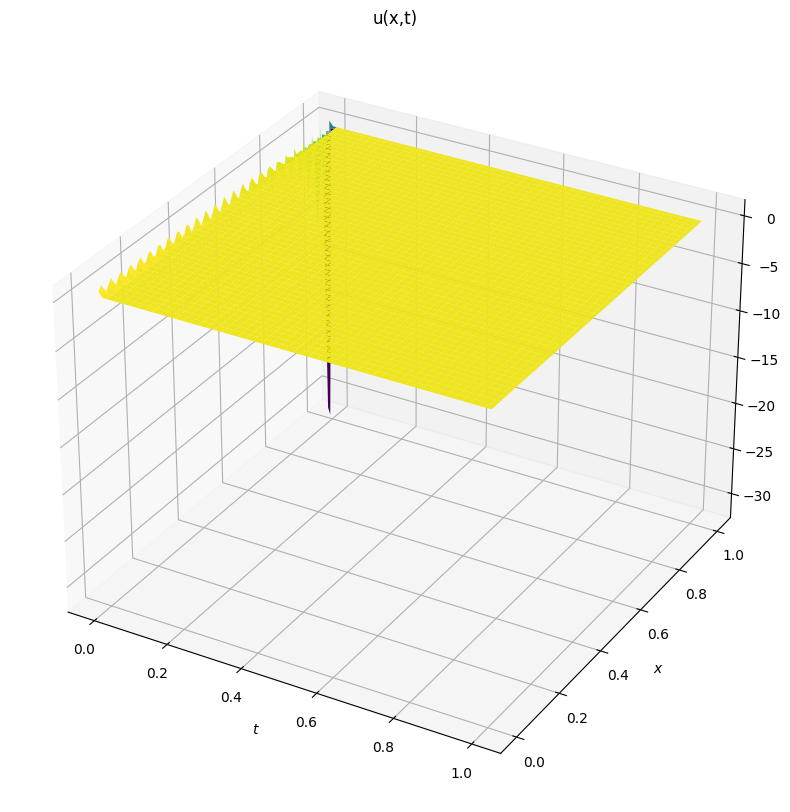

In [3]:
from pylab import *

def f_x(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if -1 <= x[i] <= 0:
            y[i] = 1
        else:  # asumimos que cualquier valor no entre -1 y 0 será entre 0 y 1
            y[i] = 0
    return y
x = linspace(-1, 1, 2000)  # Ajustamos el rango de x para que vaya de -1 a 1
f = f_x(x)

plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-1.01, 1.01])
ylim([-0.01, 1.5]),grid(),legend()
show()


def u_0(x, N=20):
    f = 1/2 * ones(len(x))  # Término constante 1/2
    for n in range(1, N):
        f += (-1)**n * sin(n * pi * x)
    return (2.0/pi) * f
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-1.01, 1.01])
ylim([-0.01, 1.5]),grid(),legend()
show()


from numpy import linspace, zeros, ones, sin, pi
import matplotlib.pyplot as plt

# Definimos la función de la condición inicial basada en la primera imagen
def f_x(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if -1 <= x[i] <= 0:
            y[i] = 1
        else:  # asumimos que cualquier valor no entre -1 y 0 será entre 0 y 1
            y[i] = 0
    return y

# Definimos la nueva función u_0(x, N) basada en la serie de Fourier proporcionada
def u_0(x, N=20):
    f = 1/2 * ones(len(x))  # El término constante 1/2
    for n in range(1, N + 1):
        f += (-1)**n * sin(n * pi * x)
    return f

# Generamos puntos en el dominio x
x = linspace(-1, 1, 2000)  # Ajustamos el rango de x para que vaya de -1 a 1
f = f_x(x)

# Graficamos la condición inicial y su aproximación con diferentes números de términos de la serie de Fourier
plt.plot(x, f, label='$f(x)$', linestyle='--')  # Línea discontinua para la condición inicial

for i in range(1, 21, 5):
    f_n = u_0(x, i)
    plt.plot(x, f_n, label='$f_N(x)$ con $N={}$'.format(i))

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial con diferentes N")
plt.xlim([-1.01, 1.01])
plt.ylim([-0.01, 1.5])
plt.grid()
plt.legend()
plt.show()


from numpy import linspace, zeros, ones, sin, pi, exp
import matplotlib.pyplot as plt

# Definimos la función de la condición inicial basada en la primera imagen
def f_x(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if -1 <= x[i] <= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y

# Definimos la serie de Fourier como se proporcionó en la imagen más reciente
def u_0(x, N=20):
    f = 1/2 * ones(len(x))
    for n in range(1, N + 1):
        f += (-1)**n * sin(n * pi * x)
    return f

# Definimos la función u_x_t(x, t, N) para la evolución temporal utilizando la serie de Fourier
def u_x_t(x, t, N=50):
    U = zeros((len(x), len(t)))
    for i in range(len(t)):
        U[:, i] = u_0(x, N) * exp(-N*2 * pi*2 * t[i])
    return U

# Definimos el dominio en x y el rango de tiempo t
x = linspace(-1, 1, 1000)  # Ajustamos el rango de x para que vaya de -1 a 1
t = linspace(0, 10, 1000)  # Ajustamos el rango de t para que vaya de 0 a 10

# Calculamos la solución U
U = u_x_t(x, t)

# Graficamos la condición inicial u(x,0) usando la primera columna de U
plt.plot(x, U[:, 0], label='$u(x,0)$')

# Configuramos los ejes, títulos y leyendas
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución temporal de la condición inicial")
plt.xlim([-1.01, 1.01])
plt.ylim([-0.01, 1.5])
plt.grid()
plt.legend()
plt.show()



plot(x,U[:,0],label='$u(x,t=0)$')
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-1.01, 1.01])
ylim([-0.01, 1.5]),grid(),legend()
show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="viridis");